# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [21]:
weather_api_key

'623cc02834fde979f27ab03258d50a26'

In [22]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | uwajima
Processing Record 4 of Set 1 | daru
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | tazacorte
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | broken hill
Processing Record 10 of Set 1 | chibougamau
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | port augusta
Processing Record 13 of Set 1 | meadow lake
Processing Record 14 of Set 1 | hukumati azrah
Processing Record 15 of Set 1 | isafjordur
Processing Record 16 of Set 1 | kaohsiung
Processing Record 17 of Set 1 | dryden
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | iskateley
Processing Record 21 of Set 1 | nemuro
Processing Record 22 of Set 1 | taiohae
City not

Processing Record 41 of Set 4 | dudinka
Processing Record 42 of Set 4 | khorixas
Processing Record 43 of Set 4 | vorgashor
Processing Record 44 of Set 4 | bay roberts
Processing Record 45 of Set 4 | coquimbo
Processing Record 46 of Set 4 | aliveri
Processing Record 47 of Set 4 | saint-philippe
Processing Record 48 of Set 4 | mejit
Processing Record 49 of Set 4 | thompson
Processing Record 0 of Set 5 | shiprock
Processing Record 1 of Set 5 | tobruk
Processing Record 2 of Set 5 | santa ana de yacuma
Processing Record 3 of Set 5 | maine soroa
Processing Record 4 of Set 5 | larache
Processing Record 5 of Set 5 | sitka
Processing Record 6 of Set 5 | fuling
Processing Record 7 of Set 5 | damasak
Processing Record 8 of Set 5 | west bay
Processing Record 9 of Set 5 | mascote
Processing Record 10 of Set 5 | hamilton
Processing Record 11 of Set 5 | altania
Processing Record 12 of Set 5 | altai
Processing Record 13 of Set 5 | broshniv-osada
Processing Record 14 of Set 5 | puerto baquerizo moreno


Processing Record 32 of Set 8 | kasongo-lunda
Processing Record 33 of Set 8 | aykhal
Processing Record 34 of Set 8 | xapuri
Processing Record 35 of Set 8 | port douglas
Processing Record 36 of Set 8 | ishigaki
Processing Record 37 of Set 8 | queenstown
Processing Record 38 of Set 8 | westport
Processing Record 39 of Set 8 | tobi village
City not found. Skipping...
Processing Record 40 of Set 8 | mecca
Processing Record 41 of Set 8 | weno
Processing Record 42 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 43 of Set 8 | sinop
Processing Record 44 of Set 8 | port alfred
Processing Record 45 of Set 8 | saskatoon
Processing Record 46 of Set 8 | kalmunai
Processing Record 47 of Set 8 | baiyin
Processing Record 48 of Set 8 | lushun
Processing Record 49 of Set 8 | fale old settlement
Processing Record 0 of Set 9 | tarakan
Processing Record 1 of Set 9 | horta
Processing Record 2 of Set 9 | lae
Processing Record 3 of Set 9 | chui
Processing Record 4 of Set 9 | chimbote
Proce

Processing Record 20 of Set 12 | kimbe
Processing Record 21 of Set 12 | sierra grande
Processing Record 22 of Set 12 | chicxulub puerto
City not found. Skipping...
Processing Record 23 of Set 12 | abepura
Processing Record 24 of Set 12 | ibi
Processing Record 25 of Set 12 | bhongir
Processing Record 26 of Set 12 | patterson
Processing Record 27 of Set 12 | kijang
Processing Record 28 of Set 12 | antsiranana
Processing Record 29 of Set 12 | flin flon
Processing Record 30 of Set 12 | yuxia
Processing Record 31 of Set 12 | glace bay
Processing Record 32 of Set 12 | wainwright
Processing Record 33 of Set 12 | anse-bertrand
Processing Record 34 of Set 12 | rexburg
Processing Record 35 of Set 12 | copala
Processing Record 36 of Set 12 | charles city
Processing Record 37 of Set 12 | malanje
Processing Record 38 of Set 12 | tweed heads
Processing Record 39 of Set 12 | zamboanguita
Processing Record 40 of Set 12 | tiznit
Processing Record 41 of Set 12 | ulaangom
Processing Record 42 of Set 12 |

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,295.68,80,31,0.21,PN,1697682623
1,albany,42.6001,-73.9662,283.48,90,85,0.98,US,1697682644
2,uwajima,33.2238,132.5600,296.51,60,6,3.08,JP,1697682913
3,daru,-9.0763,143.2092,301.76,69,100,4.39,PG,1697682695
4,carnarvon,-24.8667,113.6333,301.10,45,100,7.22,AU,1697682657


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/davidshetler/Desktop/hw6/output_data.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("/Users/davidshetler/Desktop/hw6/output_data.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,295.68,80,31,0.21,PN,1697682623
1,albany,42.6001,-73.9662,283.48,90,85,0.98,US,1697682644
2,uwajima,33.2238,132.5600,296.51,60,6,3.08,JP,1697682913
3,daru,-9.0763,143.2092,301.76,69,100,4.39,PG,1697682695
4,carnarvon,-24.8667,113.6333,301.10,45,100,7.22,AU,1697682657


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

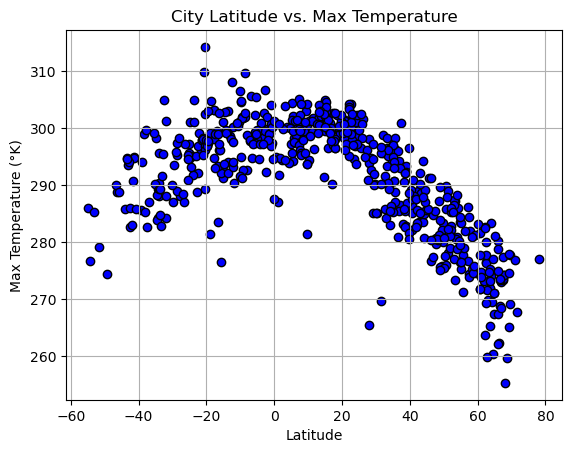

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°K)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/davidshetler/Desktop/hw6/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

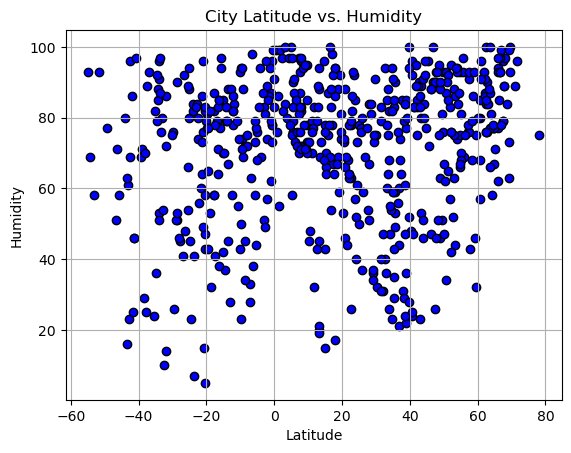

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color="blue", edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
# Save the figure
plt.savefig("/Users/davidshetler/Desktop/hw6/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

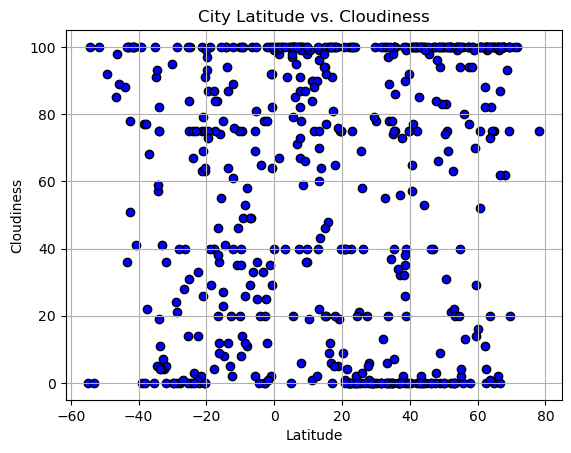

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color="blue", edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("/Users/davidshetler/Desktop/hw6/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

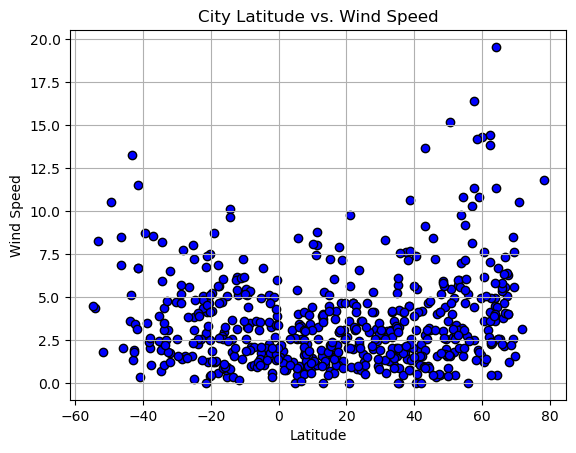

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color="blue", edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("/Users/davidshetler/Desktop/hw6/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(f'R-squared = {rvalue**2:.2f}', (text_coordinates[0], text_coordinates[1] - 20), fontsize=12, color='red')
    plt.annotate(line_eq, (text_coordinates[0], text_coordinates[1] - 10), fontsize=12, color='red')
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
   

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,283.48,90,85,0.98,US,1697682644
2,uwajima,33.2238,132.5600,296.51,60,6,3.08,JP,1697682913
5,tazacorte,28.6290,-17.9293,294.69,81,0,3.13,ES,1697682644
7,yellowknife,62.4560,-114.3525,280.05,100,100,4.12,CA,1697682362
9,chibougamau,49.9168,-74.3659,279.94,76,100,3.60,CA,1697682740


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,295.68,80,31,0.21,PN,1697682623
3,daru,-9.0763,143.2092,301.76,69,100,4.39,PG,1697682695
4,carnarvon,-24.8667,113.6333,301.10,45,100,7.22,AU,1697682657
6,port-aux-francais,-49.3500,70.2167,274.40,77,92,10.52,TF,1697682913
8,broken hill,-31.9500,141.4333,301.15,14,0,1.76,AU,1697682647


###  Temperature vs. Latitude Linear Regression Plot

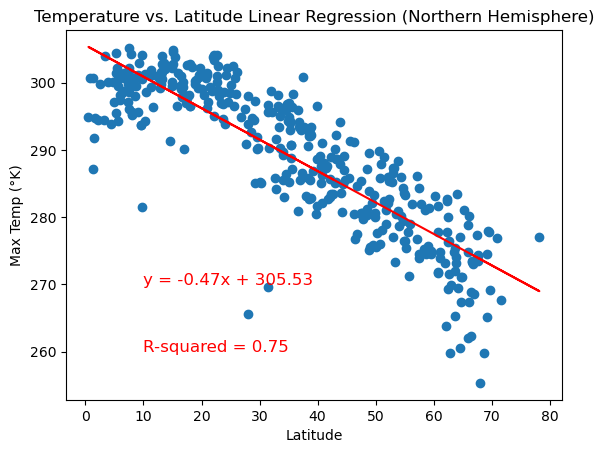

In [35]:
# Linear regression on Northern Hemisphere
#x_value= northern_hemi_df["Lat"]
#y_value = northern_hemi_df["Max Temp"]
#plt.scatter(x_value,y_value)
#plt.xlabel('Latitude')
#plt.ylabel('Max Temp')
#plt.plot(x_value, regress_values, color='red', label=f'Regression Line (R-squared = {rvalue**2:.2f})')
#plt.show()




#line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)




plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Temperature vs. Latitude Linear Regression (Northern Hemisphere)", "Max Temp (°K)", (10, 280))



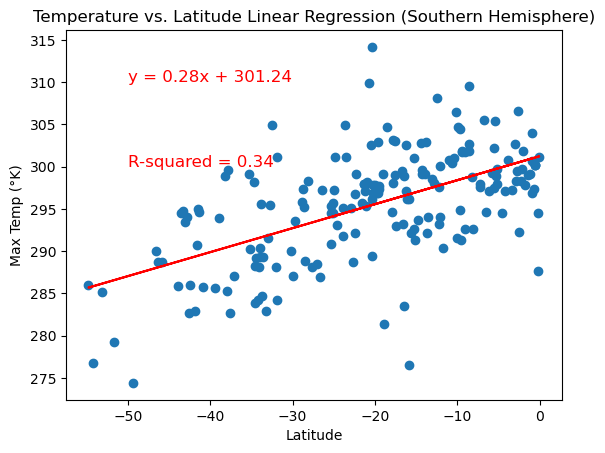

In [48]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Temperature vs. Latitude Linear Regression (Southern Hemisphere)", "Max Temp (°K)", (-50, 320))



**Discussion about the linear relationship:** You can see that as latitude gets more positive in the northern hemisphere the tempeture gets colder. On the flip side of that as latitude gets more negative on the southern hemisphere the temp gets colder. from this we can deduce that the closer you are to the equator the warmer the tempetures will be but the further away you get, the colder it will get.

### Humidity vs. Latitude Linear Regression Plot

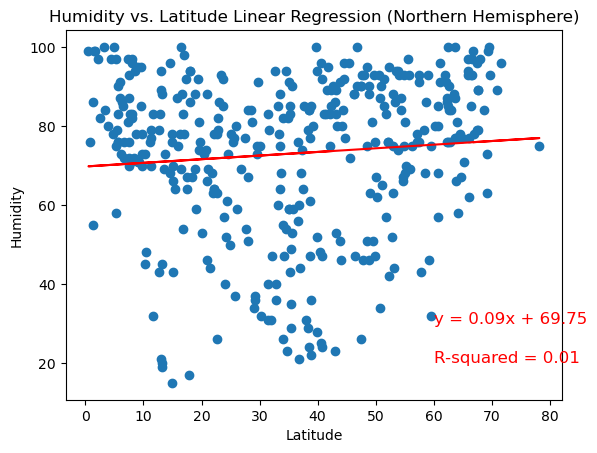

In [53]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity vs. Latitude Linear Regression (Northern Hemisphere)", "Humidity", (60, 40))


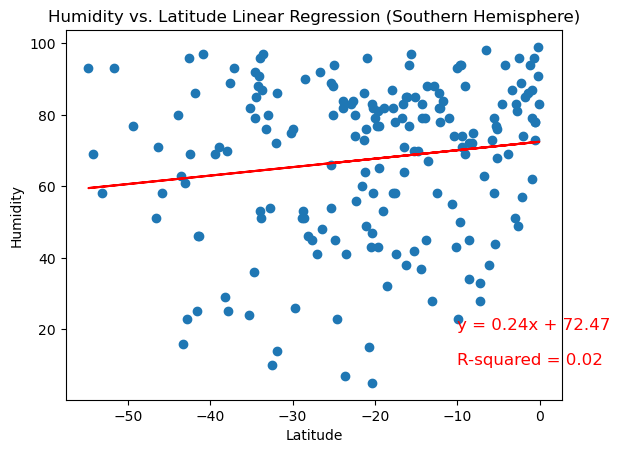

In [55]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity vs. Latitude Linear Regression (Southern Hemisphere)", "Humidity", (-10,30))

**Discussion about the linear relationship:** In the northen hemisphere you can see that as latitude increases humidity also slightly increases. In the southern there is slightly more humidity towards the euquator. Both of these lines dont have a steep slope and the data is very spread out. this means there is not a hugely strong correlation between latitude and humidity

### Cloudiness vs. Latitude Linear Regression Plot

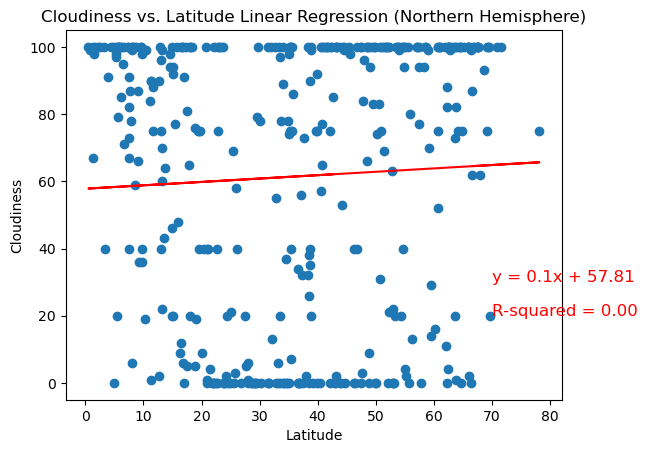

In [56]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness vs. Latitude Linear Regression (Northern Hemisphere)", "Cloudiness", (70, 40))


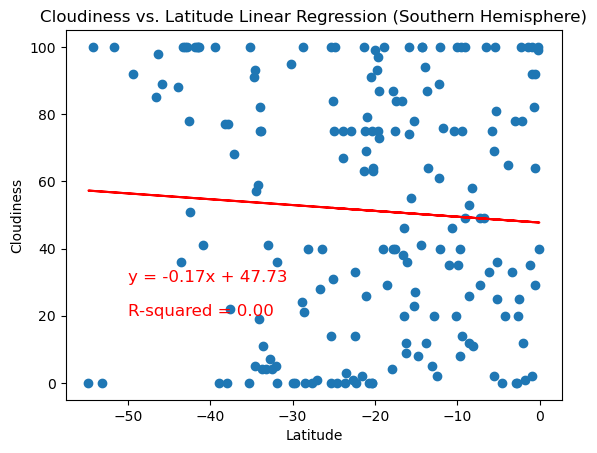

In [57]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness vs. Latitude Linear Regression (Southern Hemisphere)", "Cloudiness", (-50,40))


**Discussion about the linear relationship:** the top plot shows  a slight positive correlation between cloudiness and latitude. as you got further away from zero in the northern hemisphere cloudiness increased and the same was true with the graph below. We can see that the data is super spread out so this wouldnt be a strong conclusion to make.

### Wind Speed vs. Latitude Linear Regression Plot

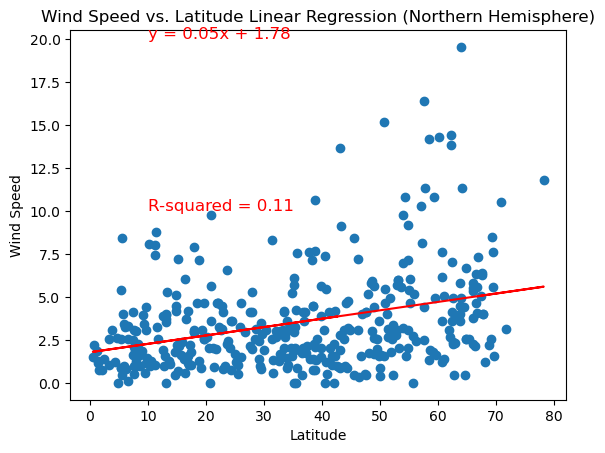

In [64]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed vs. Latitude Linear Regression (Northern Hemisphere)", "Wind Speed", (10, 30))


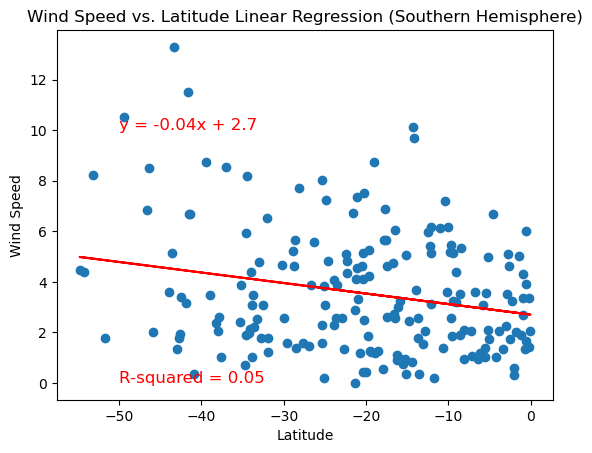

In [69]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed vs. Latitude Linear Regression (Southern Hemisphere)", "Wind Speed", (-50, 20))


**Discussion about the linear relationship:** For both of these plots we can see that wind speed on average is slower the closr you are to the equator.